<a href="https://colab.research.google.com/github/ishadvay3928/Mental-Health-in-Tech-Survey-EDA-Project/blob/main/Mental_Health_in_Tech_Survey_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Mental Health in Tech Survey EDA Project**



##### **Project Type**    -  Exploratory Data Analysis(EDA)
##### **Contribution**    - Individual


# **Project Summary -**

Amazon Prime is a paid subscription service of Amazon which is available in many countries and gives users access to additional services otherwise unavailable or available at a premium to other Amazon customers.

This project involved an extensive Exploratory Data Analysis (EDA) of the Amazon Prime Video content dataset, aiming to uncover key insights into content trends, genre distributions, ratings, and country contributions. The primary objective was to support strategic decision-making for content planning and marketing on the platform.

The analysis began with a thorough understanding of the dataset, which comprised two main files: titles.csv (containing metadata about movies and TV shows) and credits.csv (detailing cast and crew information). Initial data inspection revealed that the titles dataset had 9871 rows and 15 columns, with significant missing values in seasons, age_certification, and tmdb_score. The credits dataset, with 124235 rows and 5 columns, primarily had missing values in the character column.

Data wrangling was a crucial step, involving several key manipulations to ensure data quality and prepare for analysis. Duplicate records were removed from both datasets. Subsequently, df_titles and df_credits were merged on a common 'id' column, creating a unified dataset for comprehensive analysis. Numerical columns such as imdb_score, imdb_votes, tmdb_score, and tmdb_popularity were converted to appropriate numeric types, while type (Movie/Show) and age_certification were converted to categorical types for efficient processing and analysis. These manipulations ensured the data was clean, correctly formatted, and ready for visualization.

The data visualization phase involved creating various charts to understand relationships between variables and extract actionable insights:

- **Content Type Distribution**: A pie chart revealed that movies significantly outnumber TV shows on Amazon Prime, indicating a heavier investment in film content.
- **Top 10 Countries by Content Production:** A horizontal bar chart clearly showed that the United States dominates content production, followed by the United Kingdom, and then India, highlighting key content sourcing regions.
- **Top 10 highest-Rated Shows:** A horizontal bar chart clearly showed the top 10 Shows having maximum ratings.
- **Top Directors and Actors:** Bar charts identified frequently featured directors and actors, suggesting Amazon Prime's reliance on established talent. While this ensures reliable production, it also poses a risk of limited content variety.
- **Popular Topics (Word Cloud):** A word cloud indicated that themes like "life," "love," and "find" are prevalent in content descriptions, reflecting common narrative focuses.
- **Top 10 Genres:** A bar chart confirmed that Drama, Comedy, and Thriller are the most common genres, suggesting high user demand in these categories.
- **Age Certification Distribution:** A bar chart showed that "R" is the most common age certification, followed by "PG-13" and "PG," indicating a significant portion of content targets mature audiences.
- **IMDb Rating Distribution:** A histogram revealed that most IMDb scores fall between 5.5 and 7.5, with a peak around 6.0-6.5, suggesting that the majority of content is perceived as "average to good."
- **Content Release Year Distribution:** A line chart illustrated a sharp surge in content releases peaking around 2019-2020, followed by a noticeable decline in recent years.
- **Content Type over Runtime and IMDb Score:** Scatter plots indicated that movies generally have longer runtimes and a wider range of IMDb scores, while shows are typically shorter with consistently higher scores (mostly between 5.5 and 9).
- **TMDB Popularity vs. Runtime with IMDb Score:** This bubble chart highlighted that highly popular content often includes shorter shows and medium-length movies, frequently boasting high IMDb scores.

# **GitHub Link -**

https://github.com/ishadvay3928/Mental-Health-in-Tech-Survey-EDA-Project/blob/main/Mental_Health_in_Tech_Survey_EDA_Project.ipynb

# **Problem Statement**


**To analyze the Mental Health in Tech dataset and extract valuable insights regarding mental Health of employees, to support strategic decision-making for tackeling mental health problems faced in workspace.**



#### **Define Your Business Objective?**

The objective of this Exploratory Data Analysis (EDA) is to:

- Analyze employee responses on mental health in the workplace.

- Identify patterns and correlations between mental health treatment, work interference, company support systems, and demographics.

- Provide insights to organizations for building better mental health policies, benefits, and awareness programs.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/survey.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# titles Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count of titles dataset
df.isnull().sum()

In [ ]:
# Visualizing the missing values of titles dataset
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

- There are 1259 rows and 27 columns in the dataset.
- Out of which 3 Columns have missing Values. Column 'Comment' have most missing values of 1095 followed by 'State' and 'work_interfere'.
- Out of all 'work_interfere' Have least missing values of 264.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
#Dataset Describe
df.describe(include='all')

### Variables Description

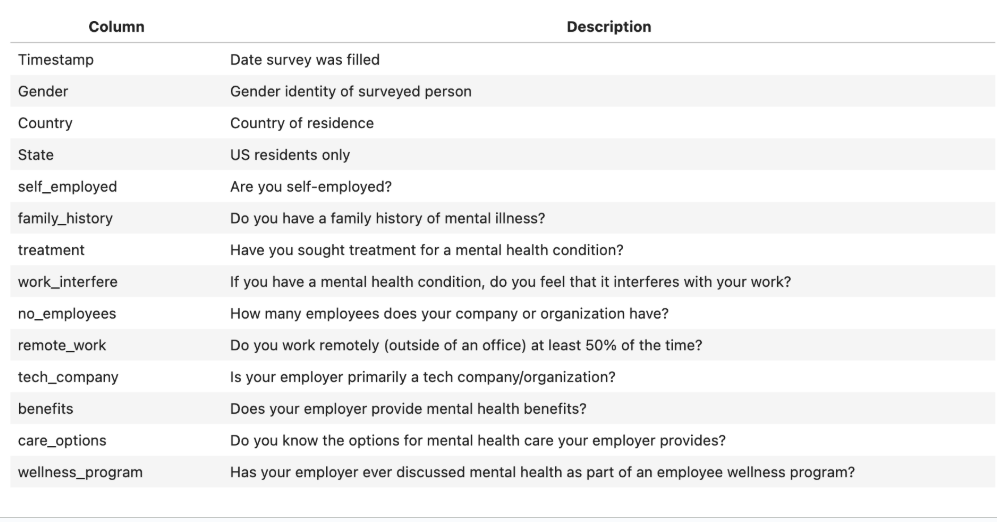

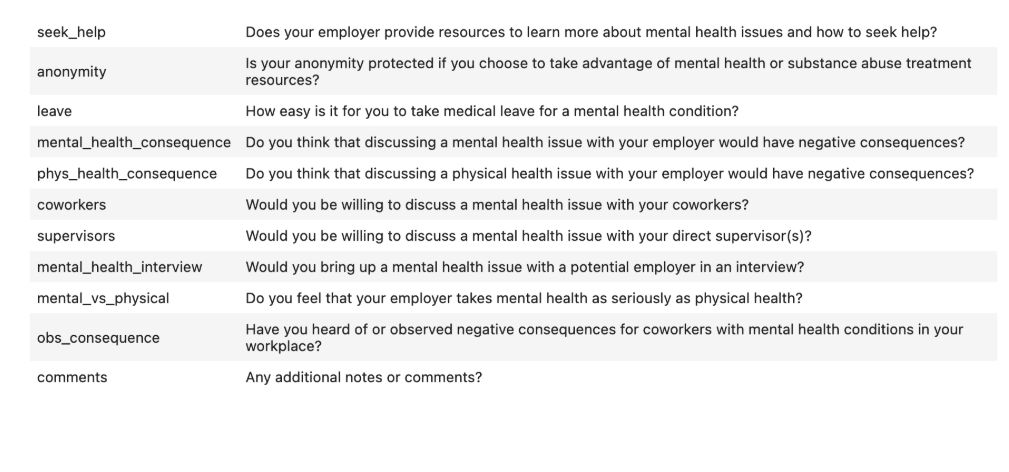

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable of dataset.
df.nunique()

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Drop comments column as it has very less non-null values
df.drop(columns=['comments'], inplace=True)

In [ ]:
# impute null values in state column
df['state'] = df['state'].fillna("Unknown")

In [ ]:
# impute null values in work_interfere column
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [ ]:
# Remove entries with Age less than 5 or greater than 100
df = df[(df['Age'] >= 5) & (df['Age'] <= 100)]

In [ ]:
df.shape

In [ ]:
# Convert timestamp to datetime datatype
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [ ]:
# Standardize the Gender column
# Convert Gender column to lowercase and strip spaces
df['Gender'] = df['Gender'].str.lower().str.strip()

# Define the replacement mapping dictionary
gender_map = {
    # Male identifiers
    'male': 'Male', 'm': 'Male', 'male-ish': 'Male', 'maile': 'Male', 'mal': 'Male',
    'malr': 'Male', 'mail': 'Male', 'make': 'Male', 'man': 'Male', 'msle': 'Male',

    # Female identifiers
    'female': 'Female', 'f': 'Female', 'femail': 'Female', 'femake': 'Female', 'woman': 'Female',

    # All others grouped as 'Others'
    'a little about you': 'Others', 'agender': 'Others', 'all': 'Others', 'androgyne': 'Others',
    'enby': 'Others', 'fluid': 'Others', 'genderqueer': 'Others', 'guy (-ish) ^_^': 'Others',
    'male leaning androgynous': 'Others', 'nah': 'Others', 'neuter': 'Others', 'non-binary': 'Others',
    'ostensibly male, unsure what that really means': 'Others', 'p': 'Others', 'queer': 'Others',
    'queer/she/they': 'Others', 'trans woman': 'Others', 'trans-female': 'Others',
    'female (trans)': 'Others', 'cis female': 'Others', 'cis male': 'Others', 'cis man': 'Others',
    'cis-female/femme': 'Others', 'female (cis)': 'Others', 'male (cis)': 'Others',
    'something kinda male?': 'Others'
}

# Apply mapping to the Gender column
df['Gender'] = df['Gender'].replace(gender_map)




In [ ]:
df.info()

### What all manipulations have you done and insights you found?

***Key Manipulations:***

- Removed Duplicates to maintain data integrity.

- Dropped 'comments' Column as it Contains very few non-null values (sparse text data).

- Imputed Missing *state* Values with "Unknown" to ensure consistent formatting in geographical analysis.

- Imputed Missing *work_interfere* Values using the mode to maintain categorical consistency for survey response interpretation.

- Remove Outliners in *Age* Values by filtering it between ages (< 5 and > 100).

- Converted Timestamp to DateTime Format to enable potential time-based trend analysis.

- Standardized Gender Values by Mapping variations like 'M', 'm', 'F', 'f' to 'Male' and 'Female'.

***Insights Gained:***

- Data deduplication ensures there are no repeated entries that might skew analysis or visualizations.

- Imputation ensures no loss of important records due to missing values.

- Age filtering removes outlier noise from demographic distributions.

- Gender standardization supports accurate gender-based comparisons.

- Cleaning timestamp allows for future time-series insights if needed (e.g., trends over survey submission times).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Age Distribution)

In [ ]:
# Age Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

This histogram was chosen to effectively display the frequency distribution of the respondents' ages, which is a continuous data set.

##### 2. What is/are the insight(s) found from the chart?

The data reveals that the largest group of respondents are young adults, predominantly in their late 20s and early 30s, with a significant drop in respondents over the age of 40.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can drive positive impact by offering healthy working environment perticularly for the dominant age group, but it also reveals a potential negative factor by highlighting a major workingforce age struggling with mental health issues.

#### Chart - 2 (Gender Distribution)

In [ ]:
# Gender Count
plt.figure(figsize=(12, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['cornflowerblue', 'plum','lavender'])
plt.title('Gender Distribution of Respondents')
plt.ylabel('')
plt.show()



##### 1. Why did you pick the specific chart?

This pie chart was chosen to clearly show the proportional breakdown of respondents by gender, which is a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the respondent base is heavily skewed towards males, who make up a vast majority (78.4%) of the participants followed by females and others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight allows for tailoring mental health initiatives to the current male-dominated workforce, but it also signals a significant risk to organizational well-being, as a lack of gender diversity can lead to support systems that fail to address the unique challenges faced by other genders, fostering an exclusionary culture.

#### Chart - 3 (Top 10 Countries)

In [ ]:
# Top 10 Countries
top_countries = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal bar chart was selected to clearly rank and compare the number of respondents from different countries, effectively handling long category labels.

##### 2. What is/are the insight(s) found from the chart?

The data shows that respondents are overwhelmingly from the United States, with a sharp decline in numbers for other countries, most of which are Western and English-speaking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight suggests that most of the responders are from US ,which means US is active country in mental health survey.On the other hand,Maximum population of responders from US and very little from other countries can not properly display the global mental in tech correctly.

#### Chart - 4 (Mental Health Treatment Distribution)

In [ ]:
# Mental Health Treatment Distribution
plt.figure(figsize=(8, 5))
df['treatment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('People undergoing Treatment for Mental Health')
plt.ylabel('')
plt.show()



##### 1. Why did you pick the specific chart?

A pie chart was chosen to effectively visualize the proportion of people undergoing mental health treatment versus those who are not, showcasing parts of a whole.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a near-equal proportion of individuals are currently undergoing mental health treatment (50.5%) as those who are not (49.5%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This insight of roughly half the population undergoing treatment suggests a significant and addressable market for mental health in tech, indicating a positive business impact by validating demand; however, the equally large segment not undergoing treatment highlights a potential for negative growth if these individuals are overlooked, representing a missed opportunity for market expansion and deeper penetration through awareness campaigns or less stigmatizing access points.

#### Chart - 5 (Work Interference Frequency)

In [ ]:
# Work Interference Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='work_interfere', order=df['work_interfere'].value_counts().index, palette='pastel')
plt.title('Work Interference Due to Mental Health')
plt.xlabel('Count')
plt.ylabel('Interference Level')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was selected to clearly compare the frequency of different "Interference Levels" of mental health on work.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that "Sometimes" is the most common work interference level due to mental health, followed by "Never," then "Rarely," and "Often" is the least common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that a significant portion of individuals are impacted by mental health at work presents a positive business impact for mental health in tech by indicating a large addressable market for workplace solutions; however, the "Never" category, while smaller, represents a potential for negative growth if mental health solutions don't proactively engage this segment through preventative measures or general wellness programs, missing an opportunity for broader impact across the entire workforce.

#### Chart - 6 (Company Size by Number of Employees)

In [ ]:
# Company Size (No. of Employees)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='no_employees', order=df['no_employees'].value_counts().index, palette='muted')
plt.title('Company Size by Number of Employees')
plt.xlabel('Count')
plt.ylabel('Company Size')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen to effectively compare the number of companies across various employee size ranges, making it easy to see which size categories are most prevalent.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that companies with 6-25 and 26-100 employees are the most numerous, followed by companies with "More than 1000" employees, then 100-500, 1-5, and lastly 500-1000 employees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that smaller to medium-sized companies represent the largest segment of the market presents a positive business impact for mental health in tech by indicating a vast, accessible target audience for scalable mental health solutions; however, the relatively lower count of very large (500-1000) companies suggests a potential for negative growth potentially overlooking the larger opportunity in serving the more numerous organizations with simpler  off-the-shelf offerings.

#### Chart - 7 (Family History)

In [ ]:
# Family History
plt.figure(figsize=(12, 6))
df['family_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['cornflowerblue', 'plum'])
plt.title('Family History of Respondents')
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was chosen to clearly show the proportion of respondents with and without a family history of mental health conditions, illustrating parts of a whole.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a majority of respondents (60.9%) do not have a family history of mental health issues, while a significant minority (39.1%) do.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The insight that nearly 40% of respondents have a family history of mental health conditions presents a positive business impact for mental health by identifying a segment with potentially higher awareness and predisposition; however, the larger segment without a family history represents a potential for negative growth if solutions solely focus on known risk factors, potentially missing the broader population who may still benefit from general mental wellness tools.

#### Chart - 8 (Medical Leave Applicable)

In [ ]:
# Medical Leave Applicable for mental Health Condition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='leave', order=df['leave'].value_counts().index, palette='muted')
plt.title('Medical Leave Applicable for mental Health Condition')
plt.xlabel('Count')
plt.ylabel('Responses')
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen to effectively compare the number of responses for different levels of ease/difficulty in taking medical leave for mental health conditions.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a large number of respondents "Don't know" if medical leave is applicable for mental health, while it's considered "Somewhat easy" or "Very easy" by a notable portion, and "Somewhat difficult" or "Very difficult" by a smaller segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. the insights highlights an opportunity for mental health platforms to improve awareness of workplace policies. However, many finding leave access "difficult" signals potential risks to employee well-being and productivity, underscoring the need for policy reforms driven by this data.











#### Chart - 9 (Treatment vs Gender)

In [ ]:
# Treatment vs Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set1')
plt.title('Treatment vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of individuals receiving or not receiving mental health treatment across different gender categories.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that a higher number of males are not receiving treatment compared to those who are, while for females, more are receiving treatment than not; the "Others" category shows very low counts for both treatment statuses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The low treatment rates among males highlight an underserved group, offering mental health platforms a key opportunity for targeted outreach. However, neglecting the unique needs of males and the underrepresented "Others" group could worsen care disparities if not properly addressed in data and solutions.

#### Chart - 10 (Family History vs Treatment)

In [ ]:
# Family History vs Treatment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='family_history', hue='treatment', palette='Set2')
plt.title('Treatment vs Family History')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of individuals receiving or not receiving mental health treatment based on their family history of mental illness.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals with no family history are more likely to not be in treatment, whereas individuals with a family history of mental illness are more likely to be receiving treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Individuals with a family history are more likely to seek treatment, offering a clear target for advanced mental health solutions. However, focusing only on high-risk groups may overlook a wider audience, limiting growth in early detection and general wellness efforts.

#### Chart - 11(Work Interference vs Treatment)

In [ ]:
# Work Interference vs Treatment
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='Set2')
plt.title('Treatment vs Work Interference')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of individuals receiving or not receiving mental health treatment across different levels of work interference.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals who experience "Often" or "Rarely" work interference are more likely to be receiving treatment, while those who experience "Never" work interference are significantly less likely to be in treatment, and "Sometimes" shows a roughly even split.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Individuals reporting frequent work interference are actively seeking treatment, indicating strong demand for workplace mental health support. However, overlooking those with little or occasional interference risks missing a large group that could benefit from early interventions, potentially limiting long-term impact and growth.











#### Chart - 12 (Remote Work vs Treatment)

In [ ]:
# Remote Work vs Treatment
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='remote_work', hue='treatment', palette='cool')
plt.title('Treatment vs Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of individuals receiving or not receiving mental health treatment based on their remote work status.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that a higher number of non-remote workers are not in treatment compared to those who are, while among remote workers, slightly more are receiving treatment than not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Remote workers show a higher tendency to seek treatment, highlighting a key audience for digital mental health solutions. However, focusing too heavily on remote setups may overlook the larger non-remote workforce, limiting opportunities to address mental health needs in traditional and hybrid workplaces.

#### Chart - 13 (Supervisor Support vs Treatment)

In [ ]:
# Supervisor Support vs Treatment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='supervisor', hue='treatment', palette='spring')
plt.title('Treatment vs Supervisor Support')
plt.xlabel('Supervisor Support')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of individuals receiving or not receiving mental health treatment across different levels of supervisor support.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals with supervisor support ("Yes") are slightly less likely to be in treatment, while those with no supervisor support ("No") are more likely to be in treatment. Individuals with "Some of them" support show a slightly higher likelihood of being in treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Individuals receiving supervisor support still seek treatment, revealing demand for mental health care tools. However, those without support being more likely in treatment signals a risk: without improving managerial empathy,mental health tools alone may fall short in fostering true workplace well-being.

#### Chart - 14 (Age vs Work Interfere colored by Treatment)

In [ ]:
# Age vs Work Interfere colored by Treatment
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x="work_interfere", y="Age", hue="treatment", jitter=True)
plt.title("Age vs Work Interfere colored by Treatment")
plt.show()

##### 1. Why did you pick the specific chart?

A stripplot (or jitter plot) was chosen to visualize the distribution of individual age data points for different work interference levels.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals across all work interference levels, particularly in "Sometimes" and "Never," span a wide age range, and that people of all ages experience work interference and either are or are not receiving treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Work interference affects all age groups, highlighting a broad market for age-inclusive mental health in tech. However, the absence of age-based treatment patterns fails to tailor interventions by specific needs may limit effectiveness and growth.

#### Chart - 15 (Correlation matrix)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoded_df = df.copy()
label_encoders = {}
for col in encoded_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(encoded_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Survey Features", fontsize=16)
plt.show()



##### 1. Why did you pick the specific chart?

The correlation heatmap effectively visualizes relationships between multiple mental health survey features at once, helping identify key associations.

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between coworker and superviser(0.57) then seek_help and wellness_program(0.47) and then care_options and benefits (0.44).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can drive positive business impact by improving mental health support systems through aligned wellness programs, benefits, and managerial support. No strong negative correlations were found, but weak associations may highlight missed opportunities in underutilized support services.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

- Focus on US and Indian content, especially in genres like Drama, Comedy, and Romance, since they’re very popular.
- Choose content with IMDb ratings between 5.5 and 7.5 – it’s generally liked by viewers and can help grow your audience.
- Shorter TV shows are trending, so adding more of them can increase user engagement and attract new subscribers.
- There has been a drop in new releases after 2020, so it’s a good idea to bring in more fresh content to fill that gap.
- While focusing on popular content, also add content from other countries and lesser-known genres to reach niche viewers and expand your audience.
- Use age certifications (like R, PG-13, PG) to understand your audience better and target marketing by age groups.
- Offer a mix , longer movies for deep stories and shorter shows for quick binge-watching, depending on what people like.
- Keep an eye on both TMDB Popularity and IMDb scores – sometimes, a show may not have the highest rating but is still very popular.

# **Conclusion**

Based on the analysis, the content landscape is dominated by US and Indian movies, particularly in Drama, Comedy, and Romance genres, with a strong preference for IMDb scores between 5.5 and 7.5. While there has been a recent surge and subsequent decline in overall content releases post-2020, popular content often comprises shorter shows and medium-length movies, frequently with high TMDB popularity and IMDb scores. To achieve business objectives, the client should strategically prioritize content acquisition in these high-demand categories and regions, while also diversifying to cater to niche markets and address the recent content decline, ultimately aiming for a balanced portfolio that maximizes audience engagement and subscriber growth.